# Time-Speed Plot with Wind Direction

what date did you release flies (e.g. 20220804): 20230621
what time did you release flies (e.g. 142040): 123200
    time  wind_direction  math_direction  wind_speed
74  1232       20.974023       -1.936733    3.856554
75  1233       26.756979       -2.016816    3.795218
76  1234       44.438895       -1.812146    3.074973


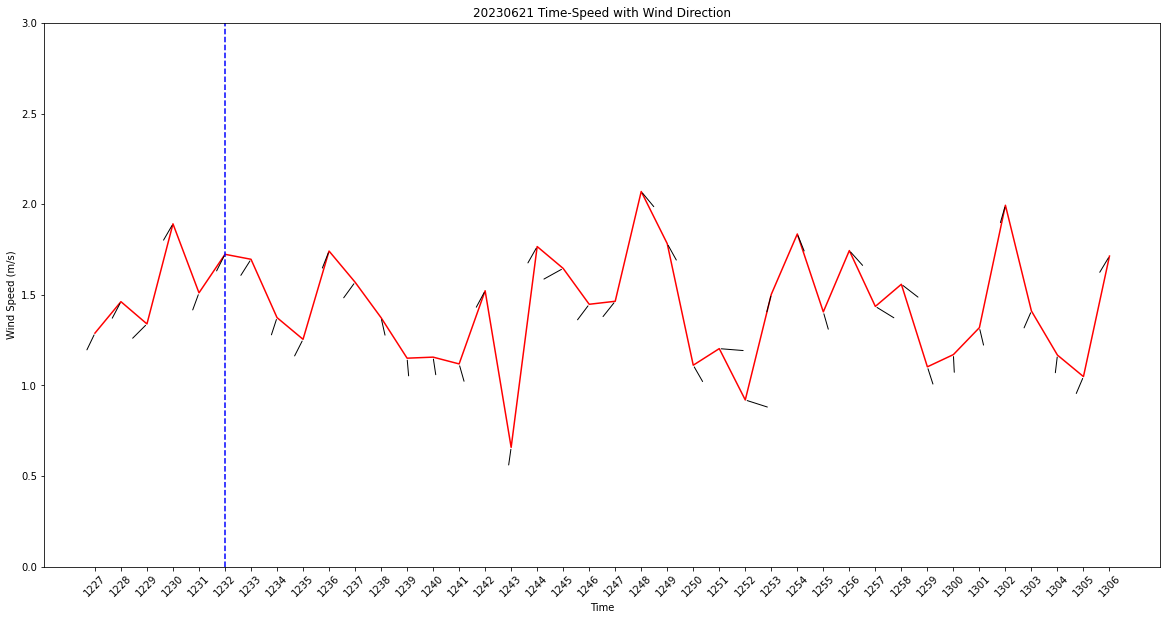

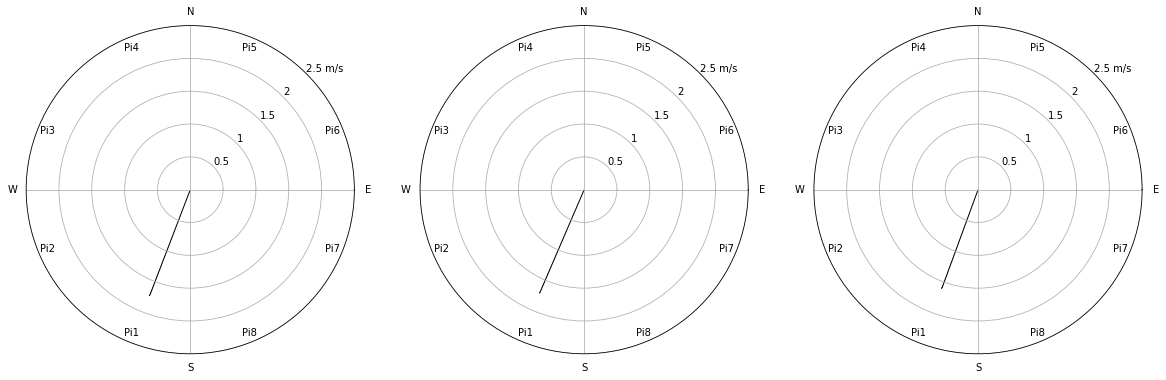

In [97]:
# 20241017

import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib


##### wind speed-time plot with wind direction #####


date=input("what date did you release flies (e.g. 20220804): ")
wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
release=input("what time did you release flies (e.g. 142040): ")
#data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"
#data_path='/media/flyranch/data21/field_release/wind_data_files/anemometer_'
data_path="/media/flyranch/14TB_Backup/field_release/wind_data_files/"
wind_txt=data_path+"anemometer_"+wind_data+".txt"
#out_path='/media/flyranch/data21/field_release/wind_data_files/wind_data_plots/'
out_path=data_path+"wind_data_plots/"

wind_df=pd.read_csv(wind_txt,delimiter=' ',header=None)
wind_df.columns=("time","wind_direction","wind_speed")

time_list=[]

for i in wind_df.iloc[:,0]:
    time=datetime.datetime.fromtimestamp(i)
    str_h=str(time.hour)
    str_m=str(time.minute)
    str_s=str(time.second)
    if len(str_h)==1:
        str_h='0'+str_h
    if len(str_m)==1:
        str_m='0'+str_m
    if len(str_s)==1:
        str_s='0'+str_s
#    str_time=str_h+str_m+str_s # include seconds
    str_time=str_h+str_m
    time_list.append(str_time)
    
wind_df.iloc[:,0]=time_list

rad_d_list=[]
mean_angle_list=[]

for i in range(len(wind_df)): 
    math_d=270-wind_df['wind_direction'][i] # need to convert from weather direction to math angle
    if math_d<0:
        math_d=math_d+360
    rad=np.deg2rad(math_d) # convert to degree to radian
    if i==0:
        rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]==wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:
            rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]!=wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:       
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
            rad_d_list=[]
            rad_d_list.append(rad)

new_wind_df=wind_df.groupby(['time'], as_index=False).mean()

new_wind_df.insert(2,"math_direction",mean_angle_list, True)
#new_wind_df['direction']=mean_angle_list

num=new_wind_df[new_wind_df['time']==release[:4]].index[0]
#print(num)
fil_wind_df=new_wind_df.iloc[num-5:num+35,:]
#print(fil_wind_df)
filtered_wind_df=fil_wind_df.reset_index()

#print(filtered_wind_df)

'''
new_t_list=new_wind_df['time']
new_s_list=new_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=new_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))
'''

new_t_list=filtered_wind_df['time']
new_s_list=filtered_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=filtered_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))

matplotlib.rcParams['pdf.fonttype'] = 42

fig=plt.figure(figsize=(20,10))
ax=plt.axes()

plt.plot(np.array(new_n_list),np.array(new_s_list), '-',markersize=6,color="r")
plt.title(date+' Time-Speed with Wind Direction')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
ax.set_xticks(new_n_list)
ax.set_xticklabels(new_t_list,rotation=45)
ax.set_ylim(0,3)
x_min=np.min(new_n_list)
x_max=np.max(new_n_list)
y_min=np.min(new_s_list)
y_max=np.max(new_s_list)

ratio=(x_max-x_min)/(y_max-y_min) # to adjust arrow length


#print(range(len(new_n_list)))
#print(new_n_list)
#print(new_d_list)

for i in range(len(new_n_list)):
    dx=(np.cos(new_d_list[i]))
    dy=(np.sin(new_d_list[i]))
    ax.annotate("",xy=(new_n_list[i],new_s_list[i]),
               xytext=(new_n_list[i]+dx,
                       new_s_list[i]+3*(dy/ratio)),arrowprops=dict(arrowstyle='-'))
    if new_t_list[i]==release[:4]:
        ax.axvline(x=i+1,ymax=3,ls='--',color='b')


#save_path='/home/flyranch/field_data_and_analysis_scripts/2021lab/analyzed_plot_figures/'
#ex_path=save_path+date

# Check whether the specified path exists or not
#isExist = os.path.exists(ex_path)

#if not isExist:  
  # Create a new directory because it does not exist 
#    os.mkdir(ex_path)

#plt.savefig(ex_path+'/'+date+'_wind_time_plot.svg')
plt.savefig(out_path+date+'_wind_time_plot.pdf',transparent=True)


ind=new_wind_df.index[new_wind_df['time']==release[:4]].tolist()[0]

release_df=new_wind_df.iloc[[ind,ind+1,ind+2]]


print(release_df)

dir_lst=[]
spd_lst=[]
wind_dir_lst=[]
dir_calc_lst=[]
spd_calc_lst=[]
wind_dir_calc_lst=[]
for i in release_df['math_direction']:
    dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(dir_calc_lst)),np.nanmean(np.cos(dir_calc_lst)))
    dir_lst.append(mean_angle)

for i in release_df['wind_direction']:
    wind_dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(wind_dir_calc_lst)),np.nanmean(np.cos(wind_dir_calc_lst)))
    wind_dir_lst.append(mean_angle)    
    
for i in release_df['wind_speed']:
    spd_calc_lst.append(i)
    mean_spd=np.mean(spd_calc_lst)*0.44704
    spd_lst.append(mean_spd)
    
#print(np.rad2deg(dir_lst))
#print(dir_calc_lst)
#print(dir_lst)
#print(spd_lst)
#print(spd_calc_lst)

fig1=plt.figure(figsize=(20,10))

a=1 #number of rows
b=3 #number of columns
c=1 #plot counter

date_list11=["20240905","20240910","20240923","20241006"]
date_list12=["20240708","20240716","20240724","20240807","20240819","20240826"]
date_list8_1=["20240630"]
date_list8_2=["20230725","20230731","20230808","20231003","20231008","20231012"]
date_list8_3=["20230621","20230630"]


if date in date_list12:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,11]

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        #ax1.set_rticklabels(labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])
        #ax1.set_rticklabels(["",0.5,1,1.5,2,""])
        #wind_d_theta=[dir_lst[i],dir_lst[i]]
        #ax1.plot(wind_d_theta,[0,spd_lst[i]],marker=(3,0,dir_lst[i]),markersize=10,ls='--',color='k')
        #ax1.plot(wind_d_theta,[0,spd_lst[i]],ls='-',color='k')

        #cor_x=np.cos(dir_lst[i])#*spd_lst[i]
        #cor_y=np.sin(dir_lst[i])#*spd_lst[i]
        #print(cor_x)
        #print(cor_y)
        #ax1.set_theta_zero_location('N')
        #ax1.set_theta_direction('clockwise')
        #arr1=plt.arrow(0,0,cor_x,cor_y,alpha=0.5,width=0.05,head_width=0.2,head_length=0.1,
        #             edgecolor='black',facecolor='black',lw=2,zorder=5)
        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])#,alpha=0.5,width=0.05,head_width=0.2,head_length=0.1,
                     #edgecolor='black',facecolor='black',lw=2,zorder=5)

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1
        
elif date in date_list11:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,""]

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        #ax1.set_rticklabels(labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])
        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            if not n==11:
                ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                    ha='center',va='center')

        c=c+1
        
elif date in date_list8_1:
    pi_loc_lst=np.arange(0,360,45)
    pi_name_lst=[10,6,5,4,3,2,1,8]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(30)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1

elif date in date_list8_2:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[2,1,8,7,6,5,4,3]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1    

elif date in date_list8_3:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[6,5,4,3,2,1,8,7]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1    
            
        
plt.savefig(out_path+date+'_initial_3_mins_wind.pdf',transparent=True)




# with Heatmap

    time  wind_direction  math_direction  wind_speed
52  1015       56.923998       -2.566437    0.974148
53  1016       29.955670       -2.093058    0.766233
54  1017       51.510735       -2.383590    0.845879
trap10
trap9
trap8
trap7
trap6
trap5
trap4
trap3
trap2
trap1
trap12


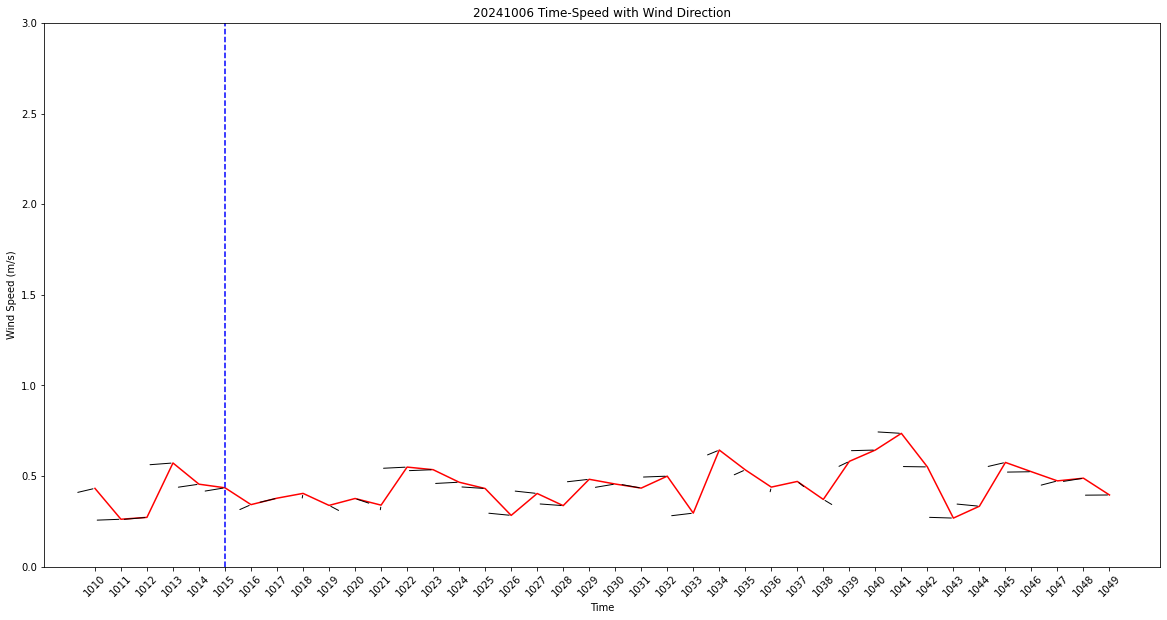

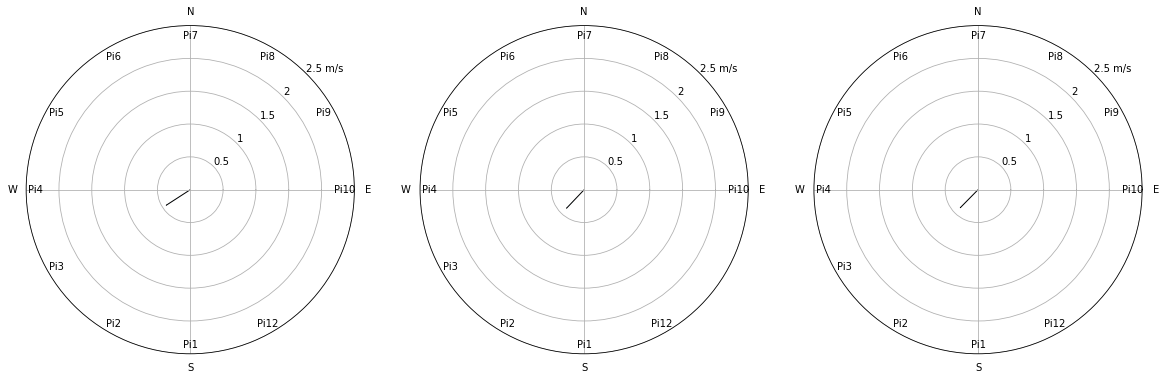

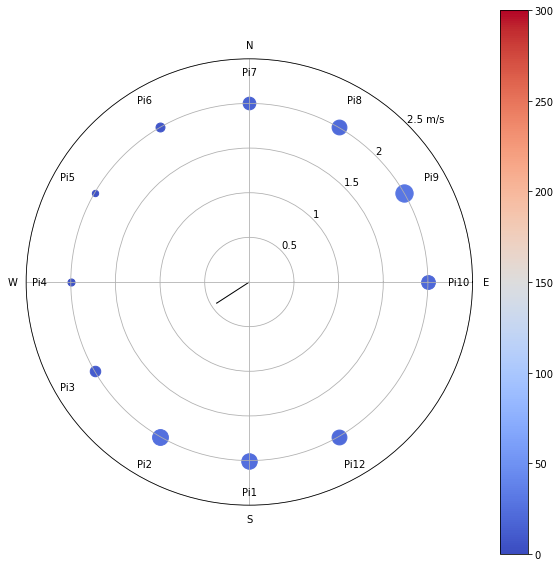

In [5]:
## 20241017

import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib


##### wind speed-time plot with wind direction #####


date=input("what date did you release flies (e.g. 20220804): ")
#date='20241006'
wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
release=input("what time did you release flies (e.g. 142040): ")
#release='101551'
#data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"
#data_path='/media/flyranch/data21/field_release/wind_data_files/anemometer_'
data_path="/media/flyranch/14TB_Backup/field_release/wind_data_files/"
wind_txt=data_path+"anemometer_"+wind_data+".txt"
#out_path='/media/flyranch/data21/field_release/wind_data_files/wind_data_plots/'
out_path=data_path+"wind_data_plots/"

wind_df=pd.read_csv(wind_txt,delimiter=' ',header=None)
wind_df.columns=("time","wind_direction","wind_speed")

time_list=[]

for i in wind_df.iloc[:,0]:
    time=datetime.datetime.fromtimestamp(i)
    str_h=str(time.hour)
    str_m=str(time.minute)
    str_s=str(time.second)
    if len(str_h)==1:
        str_h='0'+str_h
    if len(str_m)==1:
        str_m='0'+str_m
    if len(str_s)==1:
        str_s='0'+str_s
#    str_time=str_h+str_m+str_s # include seconds
    str_time=str_h+str_m
    time_list.append(str_time)
    
wind_df.iloc[:,0]=time_list

rad_d_list=[]
mean_angle_list=[]

for i in range(len(wind_df)): 
    math_d=270-wind_df['wind_direction'][i] # need to convert from weather direction to math angle
    if math_d<0:
        math_d=math_d+360
    rad=np.deg2rad(math_d) # convert to degree to radian
    if i==0:
        rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]==wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:
            rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]!=wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:       
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
            rad_d_list=[]
            rad_d_list.append(rad)

new_wind_df=wind_df.groupby(['time'], as_index=False).mean()

new_wind_df.insert(2,"math_direction",mean_angle_list, True)
#new_wind_df['direction']=mean_angle_list

num=new_wind_df[new_wind_df['time']==release[:4]].index[0]
#print(num)
fil_wind_df=new_wind_df.iloc[num-5:num+35,:]
#print(fil_wind_df)
filtered_wind_df=fil_wind_df.reset_index()

#print(filtered_wind_df)

'''
new_t_list=new_wind_df['time']
new_s_list=new_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=new_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))
'''

new_t_list=filtered_wind_df['time']
new_s_list=filtered_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=filtered_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))

matplotlib.rcParams['pdf.fonttype'] = 42

fig=plt.figure(figsize=(20,10))
ax=plt.axes()

plt.plot(np.array(new_n_list),np.array(new_s_list), '-',markersize=6,color="r")
plt.title(date+' Time-Speed with Wind Direction')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
ax.set_xticks(new_n_list)
ax.set_xticklabels(new_t_list,rotation=45)
ax.set_ylim(0,3)
x_min=np.min(new_n_list)
x_max=np.max(new_n_list)
y_min=np.min(new_s_list)
y_max=np.max(new_s_list)

ratio=(x_max-x_min)/(y_max-y_min) # to adjust arrow length


#print(range(len(new_n_list)))
#print(new_n_list)
#print(new_d_list)

for i in range(len(new_n_list)):
    dx=(np.cos(new_d_list[i]))
    dy=(np.sin(new_d_list[i]))
    ax.annotate("",xy=(new_n_list[i],new_s_list[i]),
               xytext=(new_n_list[i]+dx,
                       new_s_list[i]+3*(dy/ratio)),arrowprops=dict(arrowstyle='-'))
    if new_t_list[i]==release[:4]:
        ax.axvline(x=i+1,ymax=3,ls='--',color='b')


#save_path='/home/flyranch/field_data_and_analysis_scripts/2021lab/analyzed_plot_figures/'
#ex_path=save_path+date

# Check whether the specified path exists or not
#isExist = os.path.exists(ex_path)

#if not isExist:  
  # Create a new directory because it does not exist 
#    os.mkdir(ex_path)

#plt.savefig(ex_path+'/'+date+'_wind_time_plot.svg')
plt.savefig(out_path+date+'_wind_time_plot.pdf',transparent=True)


ind=new_wind_df.index[new_wind_df['time']==release[:4]].tolist()[0]

release_df=new_wind_df.iloc[[ind,ind+1,ind+2]]


print(release_df)

dir_lst=[]
spd_lst=[]
wind_dir_lst=[]
dir_calc_lst=[]
spd_calc_lst=[]
wind_dir_calc_lst=[]
for i in release_df['math_direction']:
    dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(dir_calc_lst)),np.nanmean(np.cos(dir_calc_lst)))
    dir_lst.append(mean_angle)

for i in release_df['wind_direction']:
    wind_dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(wind_dir_calc_lst)),np.nanmean(np.cos(wind_dir_calc_lst)))
    wind_dir_lst.append(mean_angle)    
    
for i in release_df['wind_speed']:
    spd_calc_lst.append(i)
    mean_spd=np.mean(spd_calc_lst)*0.44704
    spd_lst.append(mean_spd)
    
#print(np.rad2deg(dir_lst))
#print(dir_calc_lst)
#print(dir_lst)
#print(spd_lst)
#print(spd_calc_lst)

fig1=plt.figure(figsize=(20,10))

a=1 #number of rows
b=3 #number of columns
c=1 #plot counter

date_list11=["20240905","20240910","20240923","20241006"]
date_list12=["20240708","20240716","20240724","20240807","20240819","20240826"]
date_list8_1=["20240630"]
date_list8_2=["20230725","20230731","20230808","20231003","20231008","20231012"]
date_list8_3=["20230621","20230630"]


if date in date_list12:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,11]

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        #ax1.set_rticklabels(labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])
        #ax1.set_rticklabels(["",0.5,1,1.5,2,""])
        #wind_d_theta=[dir_lst[i],dir_lst[i]]
        #ax1.plot(wind_d_theta,[0,spd_lst[i]],marker=(3,0,dir_lst[i]),markersize=10,ls='--',color='k')
        #ax1.plot(wind_d_theta,[0,spd_lst[i]],ls='-',color='k')

        #cor_x=np.cos(dir_lst[i])#*spd_lst[i]
        #cor_y=np.sin(dir_lst[i])#*spd_lst[i]
        #print(cor_x)
        #print(cor_y)
        #ax1.set_theta_zero_location('N')
        #ax1.set_theta_direction('clockwise')
        #arr1=plt.arrow(0,0,cor_x,cor_y,alpha=0.5,width=0.05,head_width=0.2,head_length=0.1,
        #             edgecolor='black',facecolor='black',lw=2,zorder=5)
        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])#,alpha=0.5,width=0.05,head_width=0.2,head_length=0.1,
                     #edgecolor='black',facecolor='black',lw=2,zorder=5)

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1
        
elif date in date_list11:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,""]

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        #ax1.set_rticklabels(labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])
        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            if not n==11:
                ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                    ha='center',va='center')

        c=c+1
        
elif date in date_list8_1:
    pi_loc_lst=np.arange(0,360,45)
    pi_name_lst=[10,6,5,4,3,2,1,8]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(30)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1

elif date in date_list8_2:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[2,1,8,7,6,5,4,3]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1    

elif date in date_list8_3:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[6,5,4,3,2,1,8,7]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1    
            
        
plt.savefig(out_path+date+'_initial_3_mins_wind.pdf',transparent=True)







fig2,ax2=plt.subplots(figsize=(10,10),subplot_kw={'projection':'polar'})

with open('/media/flyranch/14TB_Backup/field_release/field_parameters_kh.json', 'r') as file:
    data = json.load(file)
file.close()
'''
collection_list=[]
for pi in pi_name_lst:
    if 'trap'+str(pi) in data["collections"][date].keys():
        print('trap'+str(pi))
        collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

collection_list.append(0)
#test_list=[19,30,22,16,8,4,5,11,25,24,22,0]
r_list=[2]*12
'''

if date in date_list12:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,11]

    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    #test_list=[19,30,22,16,8,4,5,11,25,24,22,0]
    r_list=[2]*12    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')
    plt.colorbar()


elif date in date_list11:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,""]

    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    #test_list=[19,30,22,16,8,4,5,11,25,24,22,0]
    r_list=[2]*12    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        if not n==11:
            ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                     ha='center',va='center')
    plt.colorbar()

elif date in date_list8_1:
    pi_loc_lst=np.arange(0,360,45)
    pi_name_lst=[10,6,5,4,3,2,1,8]   
    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    r_list=[2]*8    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')
    plt.colorbar()

elif date in date_list8_2:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[2,1,8,7,6,5,4,3]    
    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    r_list=[2]*8    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')
    plt.colorbar() 
    
elif date in date_list8_3:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[6,5,4,3,2,1,8,7]   
    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    r_list=[2]*8    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax300,vmin=0)
        ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')
    plt.colorbar() 
    
plt.savefig(out_path+date+'_fly_collection_VS_initial_1_min_wind.pdf',transparent=True)


# Box and Whisker Plot for wind Data

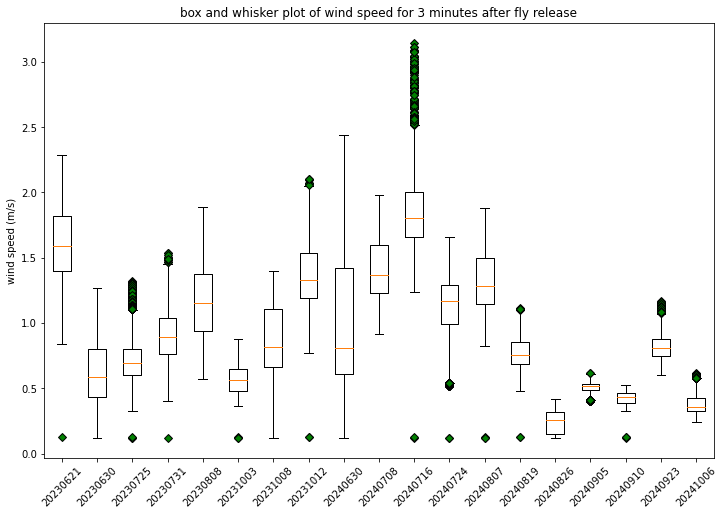

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib
##### box and whisker plot of wind speed for 3 minutes after fly release #####


date_list=["20230621","20230630","20230725","20230731","20230808","20231003",
           "20231008","20231012","20240630","20240708","20240716","20240724",
           "20240807","20240819","20240826","20240905","20240910","20240923","20241006"]
#"20220804","20220914","20220923"
#"20190706","20190611","20190508","20190419"
release_list=["123200","094055","113037","105622","094526","154610",
              "122251","135550","112239","090049","094420","082053",
              "074202","081047","082421","084649","082316","082010","101551"]
#"105542","113540","114246"
#"081100","074800","100400","115600"
#date=input("what date did you,release flies (e.g. 20220804): ")
#date="20230731"
#wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
#release=input("what time did you release flies (e.g. 142040): ")
#release="105622"
#data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"

data_list=[]

for date in date_list:
    wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
    release=release_list[date_list.index(date)]
    #print(release)
    #data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"
    data_path="/media/flyranch/14TB_Backup/field_release/wind_data_files/"
    directory=data_path+"anemometer_"+wind_data+".txt"
    wind_df=pd.read_csv(directory,delimiter=' ',header=None)
    wind_df.columns=("time","direction","wind_speed")
    time_list=[]

    for i in wind_df.iloc[:,0]:
        time=datetime.datetime.fromtimestamp(i)
        str_h=str(time.hour)
        str_m=str(time.minute)
        str_s=str(time.second)
        if len(str_h)==1:
            str_h='0'+str_h
        if len(str_m)==1:
            str_m='0'+str_m
        if len(str_s)==1:
            str_s='0'+str_s
        str_time=str_h+str_m+str_s # include seconds
        #str_time=str_h+str_m
        int_time=int(str_h)*3600+int(str_m)*60+int(str_s)
        time_list.append(int_time)

    ### adjust
    wind_df.iloc[:,0]=time_list
    ### focus on 5minutes after release
    release_in_sec=int(release[:2])*3600+int(release[2:4])*60+int(release[4:])
    release_in_sec_plus_3min=release_in_sec+180
    #this_time=int(wind_df['time'][:2])*3600+int(wind_df['time'][2:4])*60+int(wind_df['time'][4:])
    new_wind_df=wind_df.loc[(release_in_sec<=wind_df['time'])&(wind_df['time']<=release_in_sec_plus_3min)]
    #new_wind_df=wind_df.loc[(release<=wind_df['time'])&(wind_df['time']<=str(int(release)+5))]   

    td_list=[]
    #print(new_wind_df.iloc[:,0])
    #for i in new_wind_df.iloc[:,0]:
    #    if int(i)<36000:
    #        td=str(timedelta(seconds=i))[:1]+str(timedelta(seconds=i))[2:4]+str(timedelta(seconds=i))[5:7]
    #    else:
    #        td=str(timedelta(seconds=i))[:2]+str(timedelta(seconds=i))[3:5]+str(timedelta(seconds=i))[6:8]
    #    td_list.append(td)
        
    #new_wind_df.iloc[:,0]=td_list
    spd_list=new_wind_df['wind_speed']*.44704 # convert mph to m/s

    matplotlib.rcParams['pdf.fonttype'] = 42
    green_diamond = dict(markerfacecolor='g', marker='D')
    data=spd_list
    data_list.append(data)

fig,ax=plt.subplots(figsize=(12,8))
#ax.set_title("box and whisker plot of wind speed for 3 minutes after fly release \n the last 4 from Kate Leitch's data")
ax.set_title("box and whisker plot of wind speed for 3 minutes after fly release")
ax.boxplot(data_list, flierprops=green_diamond)
ax.set_xticklabels(date_list,rotation=45)
ax.set_ylabel("wind speed (m/s)")

out_path=data_path+"wind_data_plots/boxplot_for_wind_data.pdf"

#plt.savefig('/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/wind_data_plots/boxplot_for_wind_data.pdf')
plt.savefig(out_path)

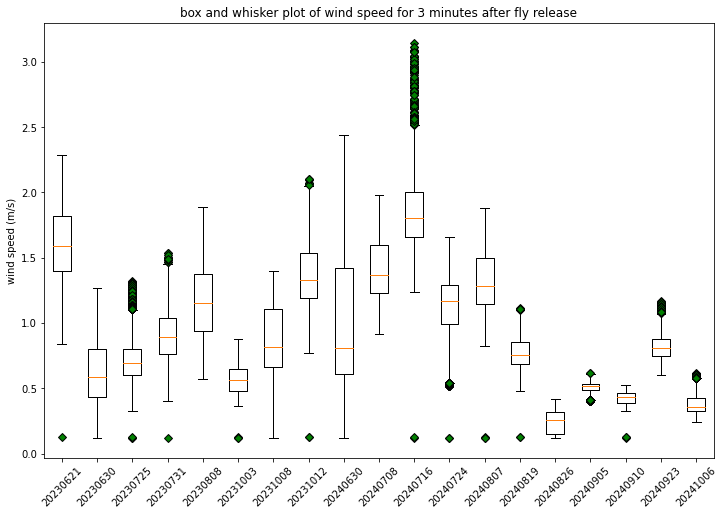

In [122]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib
##### box and whisker plot of wind speed for 3 minutes after fly release #####


date_list=["20230621","20230630","20230725","20230731","20230808","20231003",
           "20231008","20231012","20240630","20240708","20240716","20240724",
           "20240807","20240819","20240826","20240905","20240910","20240923","20241006"]
#"20220804","20220914","20220923"
#"20190706","20190611","20190508","20190419"
release_list=["123200","094055","113037","105622","094526","154610",
              "122251","135550","112239","090049","094420","082053",
              "074202","081047","082421","084649","082316","082010","101551"]
#"105542","113540","114246"
#"081100","074800","100400","115600"
#date=input("what date did you,release flies (e.g. 20220804): ")
#date="20230731"
#wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
#release=input("what time did you release flies (e.g. 142040): ")
#release="105622"
#data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"

data_list=[]

for date in date_list:
    wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
    release=release_list[date_list.index(date)]
    #print(release)
    #data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"
    data_path="/media/flyranch/14TB_Backup/field_release/wind_data_files/"
    directory=data_path+"anemometer_"+wind_data+".txt"
    wind_df=pd.read_csv(directory,delimiter=' ',header=None)
    wind_df.columns=("time","direction","wind_speed")
    time_list=[]

    for i in wind_df.iloc[:,0]:
        time=datetime.datetime.fromtimestamp(i)
        str_h=str(time.hour)
        str_m=str(time.minute)
        str_s=str(time.second)
        if len(str_h)==1:
            str_h='0'+str_h
        if len(str_m)==1:
            str_m='0'+str_m
        if len(str_s)==1:
            str_s='0'+str_s
        str_time=str_h+str_m+str_s # include seconds
        #str_time=str_h+str_m
        int_time=int(str_h)*3600+int(str_m)*60+int(str_s)
        time_list.append(int_time)

    ### adjust
    wind_df.iloc[:,0]=time_list
    ### focus on 5minutes after release
    release_in_sec=int(release[:2])*3600+int(release[2:4])*60+int(release[4:])
    release_in_sec_plus_3min=release_in_sec+180
    #this_time=int(wind_df['time'][:2])*3600+int(wind_df['time'][2:4])*60+int(wind_df['time'][4:])
    new_wind_df=wind_df.loc[(release_in_sec<=wind_df['time'])&(wind_df['time']<=release_in_sec_plus_3min)]
    #new_wind_df=wind_df.loc[(release<=wind_df['time'])&(wind_df['time']<=str(int(release)+5))]   

    td_list=[]
    #print(new_wind_df.iloc[:,0])
    #for i in new_wind_df.iloc[:,0]:
    #    if int(i)<36000:
    #        td=str(timedelta(seconds=i))[:1]+str(timedelta(seconds=i))[2:4]+str(timedelta(seconds=i))[5:7]
    #    else:
    #        td=str(timedelta(seconds=i))[:2]+str(timedelta(seconds=i))[3:5]+str(timedelta(seconds=i))[6:8]
    #    td_list.append(td)
        
    #new_wind_df.iloc[:,0]=td_list
    spd_list=new_wind_df['wind_speed']*.44704 # convert mph to m/s

    matplotlib.rcParams['pdf.fonttype'] = 42
    green_diamond = dict(markerfacecolor='g', marker='D')
    data=spd_list
    data_list.append(data)

fig,ax=plt.subplots(figsize=(12,8))
#ax.set_title("box and whisker plot of wind speed for 3 minutes after fly release \n the last 4 from Kate Leitch's data")
ax.set_title("box and whisker plot of wind speed for 3 minutes after fly release")
ax.boxplot(data_list, flierprops=green_diamond)
ax.set_xticklabels(date_list,rotation=45)
ax.set_ylabel("wind speed (m/s)")

out_path=data_path+"wind_data_plots/boxplot_for_wind_data.pdf"

#plt.savefig('/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/wind_data_plots/boxplot_for_wind_data.pdf')
#plt.savefig(out_path)

12:32:00
09:40:55
11:30:37
10:56:22
09:45:26
15:46:10
12:22:51
13:55:50
11:22:39
09:00:49
09:44:20
08:20:53
07:42:02
08:10:47
08:24:21
08:46:49
08:23:16
08:20:10
10:15:51


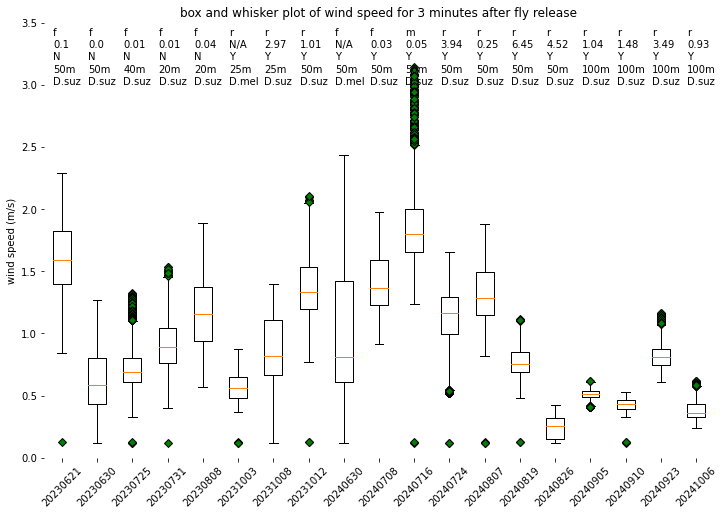

In [195]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib

path='/media/flyranch/14TB_Backup/field_release/'

with open(path+'field_parameters_kh.json', 'r') as file:
    data=json.load(file)
file.close()


date_list=[]
for date in data["dates"]:
    date_list.append(date)
    
release_list=[]
for DATE,release_time in data["time_of_fly_release"].items():
    if DATE in date_list:
        release_list.append(release_time)

species_list=[] 
for DATE,species in data["species"].items():
    if DATE in date_list:
        species_list.append(species)
        
n_flies_list=[]
for DATE,n_flies in data["estimated_number_of_flies_released"].items():
    if DATE in date_list:
        n_flies_list.append(n_flies)
        
baits_list=[]
for DATE, bait in data["baits"].items():
    if DATE in date_list:
        if bait=="fermented bait" or bait=="red wine+vinegar":
            baits_list.append(bait)
        else:
            baits_list.append('mix')            
        
distance_list=[]
for DATE, distance in data["distances"].items():
    if DATE in date_list:
        distance_list.append(distance)
        
starvation_list=[]
for DATE, starvation in data["starvation"].items():
    if DATE in date_list:
        starvation_list.append(starvation)
               
collection_list=[]
for DATE,collections in data["collections"].items():
    if DATE in date_list:
        if collections=="not collected":
            collection_list.append('N/A')
        else:
            collection_list.append(collections["all"]["total"])

collection_rate_list=[]
for i in range(len(collection_list)):
    if collection_list[i]=='N/A':
        collection_rate_list.append('N/A')
    else:
        collection_rate_list.append(np.round(collection_list[i]/n_flies_list[i]*100,2))


data_list=[]        
        
for date in date_list:
    wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
    release=release_list[date_list.index(date)]
    print(release)
    #data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"
    data_path="/media/flyranch/14TB_Backup/field_release/wind_data_files/"
    directory=data_path+"anemometer_"+wind_data+".txt"
    wind_df=pd.read_csv(directory,delimiter=' ',header=None)
    wind_df.columns=("time","direction","wind_speed")
    time_list=[]

    for i in wind_df.iloc[:,0]:
        time=datetime.datetime.fromtimestamp(i)
        str_h=str(time.hour)
        str_m=str(time.minute)
        str_s=str(time.second)
        if len(str_h)==1:
            str_h='0'+str_h
        if len(str_m)==1:
            str_m='0'+str_m
        if len(str_s)==1:
            str_s='0'+str_s
        str_time=str_h+str_m+str_s # include seconds
        #str_time=str_h+str_m
        int_time=int(str_h)*3600+int(str_m)*60+int(str_s)
        time_list.append(int_time)

    ### adjust
    wind_df.iloc[:,0]=time_list
    ### focus on 5minutes after release
    release_in_sec=int(release[:2])*3600+int(release[3:5])*60+int(release[6:])
    release_in_sec_plus_3min=release_in_sec+180
    #this_time=int(wind_df['time'][:2])*3600+int(wind_df['time'][2:4])*60+int(wind_df['time'][4:])
    new_wind_df=wind_df.loc[(release_in_sec<=wind_df['time'])&(wind_df['time']<=release_in_sec_plus_3min)]
    #new_wind_df=wind_df.loc[(release<=wind_df['time'])&(wind_df['time']<=str(int(release)+5))]   

    td_list=[]
    #print(new_wind_df.iloc[:,0])
    #for i in new_wind_df.iloc[:,0]:
    #    if int(i)<36000:
    #        td=str(timedelta(seconds=i))[:1]+str(timedelta(seconds=i))[2:4]+str(timedelta(seconds=i))[5:7]
    #    else:
    #        td=str(timedelta(seconds=i))[:2]+str(timedelta(seconds=i))[3:5]+str(timedelta(seconds=i))[6:8]
    #    td_list.append(td)
        
    #new_wind_df.iloc[:,0]=td_list
    spd_list=new_wind_df['wind_speed']*.44704 # convert mph to m/s

    matplotlib.rcParams['pdf.fonttype'] = 42
    green_diamond = dict(markerfacecolor='g', marker='D')
    data=spd_list
    data_list.append(data)

fig,ax=plt.subplots(figsize=(12,8))
#ax.set_title("box and whisker plot of wind speed for 3 minutes after fly release \n the last 4 from Kate Leitch's data")
ax.set_title("box and whisker plot of wind speed for 3 minutes after fly release")
ax.boxplot(data_list, flierprops=green_diamond)
ax.set_xticklabels(date_list,rotation=45)
ax.set_ylabel("wind speed (m/s)")
ax.set_ylim(0,3.5)
ax.spines[['right','top','left','bottom']].set_visible(False)


for i in range(len(date_list)):
    ax.text(i+.75,3,species_list[i][:5])
    ax.text(i+.75,3.1,distance_list[i])
    ax.text(i+.75,3.2,starvation_list[i])
    ax.text(i+.75,3.3,collection_rate_list[i])
    ax.text(i+.75,3.4,baits_list[i][:1])

    
out_path=data_path+"wind_data_plots/boxplot_for_wind_data_ver2.pdf"

#plt.savefig('/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/wind_data_plots/boxplot_for_wind_data.pdf')
plt.savefig(out_path)

# Plot for All traps

10
12
1
2
3
4
5
6
7
8
9


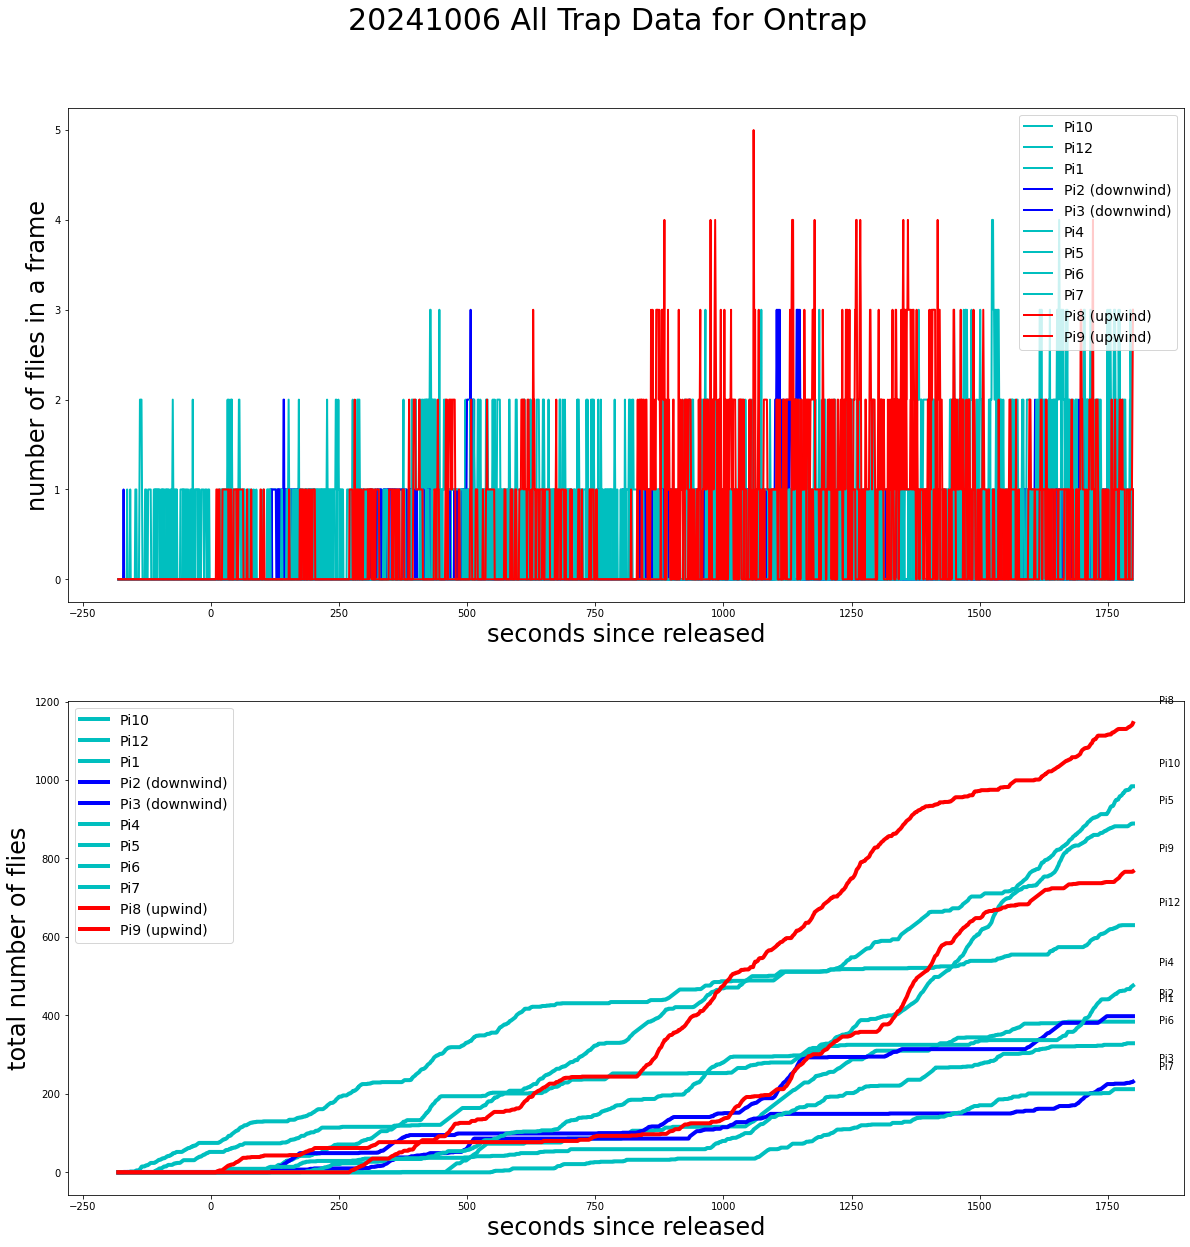

In [9]:
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pdb
import sys
import glob
import os
import re
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline


def calc_sec_since_release(standard,time_stamp):
	zero=int(standard[0:2])*3600+int(standard[3:5])*60+int(standard[6:8])+1
	sec=int(time_stamp[0:2])*3600+int(time_stamp[3:5])*60+int(time_stamp[6:8])
	sec_since_release=sec-zero
	return sec_since_release

def make_accumulation_list(list):
	acc_list=[]
	for i in range(len(list)):
		ele=np.sum(list[:i+1])
		acc_list.append(ele)
	return acc_list



#date=input("what date data you wanna use to make the plot (e.g. 20220725): ")
date='20241006'
#release=input("What time flies were released? (e.g. 093425) :")
release='101551'
if (len(release)==6 and type(int(release))==int):
	pass
else:
	print("please enter 6 numbers (000000-235959)")
	sys.exit()

path='/media/flyranch/14TB_Backup/field_release/'
json_path=path+'all_traps_final_analysis_json_files/'
list_of_files=sorted(glob.glob(json_path+date+'/*/master_*.json'))

released_time=release[0:2]+':'+release[2:4]+':'+release[4:6]

#c=0

with open(path+'wind_direction.json', 'r') as file:
    data = json.load(file)
file.close()

upwind_list=data["wind_direction"][date]["upwind"]
downwind_list=data["wind_direction"][date]["downwind"]
Color=''
matplotlib.rcParams['pdf.fonttype'] = 42

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,20))
fig.suptitle(date+' All Trap Data for Ontrap',size=30,x=0.5,y=0.95)
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

#pdb.set_trace()

for file in list_of_files:
    f=open(file)
    data=json.load(f)
    #create lists
    on_trap_list=[]
    in_trap_list=[]
    sec_since_release_list=[]
    actual_timestamp_list=[]


    string=file
    pattern='master'
    match=(re.search(pattern,string))
    
    j_pattern='.json'
    j_match=(re.finditer(j_pattern,string))
    count=0
    for i in j_match:
        if count==1:
            jj_match=i
        count+=1
    
    END=match.end()
    START=jj_match.start()
    DIFF=START-END
    
    if DIFF==24:
        trap_name=string[match.end()+6:-5] ###remove 'master_trap_' and '.json'
        t_name=string[match.end()+6:match.end()+9] ###Pi_X
    else:
        trap_name=string[match.end()+6:-5] ###remove 'master_trap_' and '.json'
        t_name=string[match.end()+6:match.end()+10] ###Pi_X
    print(t_name[2:])

    for i in data['trap_'+trap_name]:
        for k in data['trap_'+trap_name][i]:
            if i=="flies on trap over time:":
                on_trap_list.append(k)
            elif i=="flies in trap over time:":
                in_trap_list.append(k)
    #		elif i=="seconds since release:":
    #			sec_since_release_list.append(int(k))
            elif i=="actual timestamp:":
                if len(str(int(k)))==5:
                    str_time='0'+str(int(k))[0:1]+':'+str(int(k))[1:3]+':'+str(int(k))[3:5]
                    actual_timestamp_list.append(str_time)
                elif len(str(int(k)))==6:
                    str_time=str(int(k))[0:2]+':'+str(int(k))[2:4]+':'+str(int(k))[4:6]
                    actual_timestamp_list.append(str_time)

    f.close()

    for i in actual_timestamp_list:
        s=calc_sec_since_release(released_time,i)
        sec_since_release_list.append(s)

    on_trap_acc_list=make_accumulation_list(on_trap_list)
    in_trap_acc_list=make_accumulation_list(in_trap_list)



    #print(on_trap_acc_list)
    #print(Y_)
    #print(sec_since_release_list)


    #ax1.plot(sec_since_release_list, on_trap_list, '-',markersize=6,label='trap_'+trap_name)
    #ax2.plot(actual_timestamp_list, in_trap_list, '-',markersize=6,color="b",label="in trap")
    #ax1.legend(loc="upper right",fontsize=14)

    ###to smooth line plots
    #cubic_interploation_model = interp1d(sec_since_release_list, on_trap_list, kind = "cubic")
    #X_Y_Spline = make_interp_spline(sec_since_release_list, on_trap_list)
    # Plotting the Graph
    #X_=np.linspace(np.array(sec_since_release_list).min(), np.array(sec_since_release_list).max(), 500)
    #Y_=cubic_interploation_model(X_)
    #Y_=X_Y_Spline(X_)

    #for i in range(len(w_lst)):
    #    if w_lst[i][0][0]==int(t_name[-1]):
    
    if int(t_name[2:]) in upwind_list:
        Color='r'
        ax1.plot(sec_since_release_list,on_trap_list,'-',markersize=6,linewidth=2,label=t_name+' (upwind)',color=Color)
        ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name+' (upwind)',color=Color)
        ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    elif int(t_name[2:]) in downwind_list:
        Color='b'
        ax1.plot(sec_since_release_list,on_trap_list,'-',markersize=6,linewidth=2,label=t_name+' (downwind)',color=Color)
        ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name+' (downwind)',color=Color)
        ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    else:
        Color='c'
        ax1.plot(sec_since_release_list,on_trap_list,'-',markersize=6,linewidth=2,label=t_name,color=Color)
        ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name,color=Color)
        ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    #print(Color)
    #ax1.plot(sec_since_release_list,on_trap_list,'-',markersize=6,linewidth=2,label=t_name,color=Color)
    #ax1.plot(X_,Y_,'-',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')')
    ax1.legend(loc="upper right",fontsize=14)
    ax1.set_xlabel('seconds since released',size=24)
    ax1.set_ylabel('number of flies in a frame',size=24)

    #ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name,color=Color)
    #ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    ax2.legend(loc="upper left",fontsize=14)
    ax2.set_xlabel('seconds since released',size=24)
    ax2.set_ylabel('total number of flies',size=24)

'''
        elif w_lst[i][0][1]==int(t_name[-1]):
            ax1.plot(X_,Y_,'--',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')',color=colors[c])
            #ax1.plot(X_,Y_,'-',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')')
            ax1.legend(loc="upper right",fontsize=14)
            ax1.set_xlabel('seconds since released',size=24)
            ax1.set_ylabel('number of flies in a frame',size=24)


            ax2.plot(sec_since_release_list,on_trap_acc_list,'--',markersize=6,linewidth=4,label=t_name+'('+wind_dir+')',color=colors[c])
            ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
            ax2.legend(loc="upper left",fontsize=14)
            ax2.set_xlabel('seconds since released',size=24)
            ax2.set_ylabel('total number of flies',size=24)
'''

    #ax1.plot(X_,Y_,'-',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')',color=colors[c])
    #ax1.plot(X_,Y_,'-',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')')
    #ax1.legend(loc="upper right",fontsize=14)
    #ax1.set_xlabel('seconds since released',size=24)
    #ax1.set_ylabel('number of flies in a frame',size=24)

    #ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name+'('+wind_dir+')',color=colors[c])
    #ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    #ax2.legend(loc="upper left",fontsize=14)
    #ax2.set_xlabel('seconds since released',size=24)
    #ax2.set_ylabel('total number of flies',size=24)

    #c+=1


#data_path='/home/flyranch/field_data_and_analysis_scripts/2021lab/analyzed_plot_figures/'
#ex_path=data_path+date

# Check whether the specified path exists or not
#isExist = os.path.exists(ex_path)

#if not isExist:  
  # Create a new directory because it does not exist 
#    os.mkdir(ex_path)

#plt.savefig(ex_path+'/'+date+'_all_on_trap_data_plot.jpg')
#plt.savefig(ex_path+'/'+date+'_all_on_trap_data_plot.pdf',transparent=True)

out_path=path+'analyzed_plot_figures/'
ex_path=out_path+date

# Check whether the specified path exists or not
isExist = os.path.exists(ex_path)

if not isExist:  
  # Create a new directory because it does not exist 
    os.makedirs(ex_path)

plt.savefig(ex_path+'/'+date+'_all_on_trap_data_plot.pdf',transparent=True)


# Heatmap

Pi1
DOWNwind
Pi2
DOWNwind
Pi7
UPwind
Pi8
UPwind


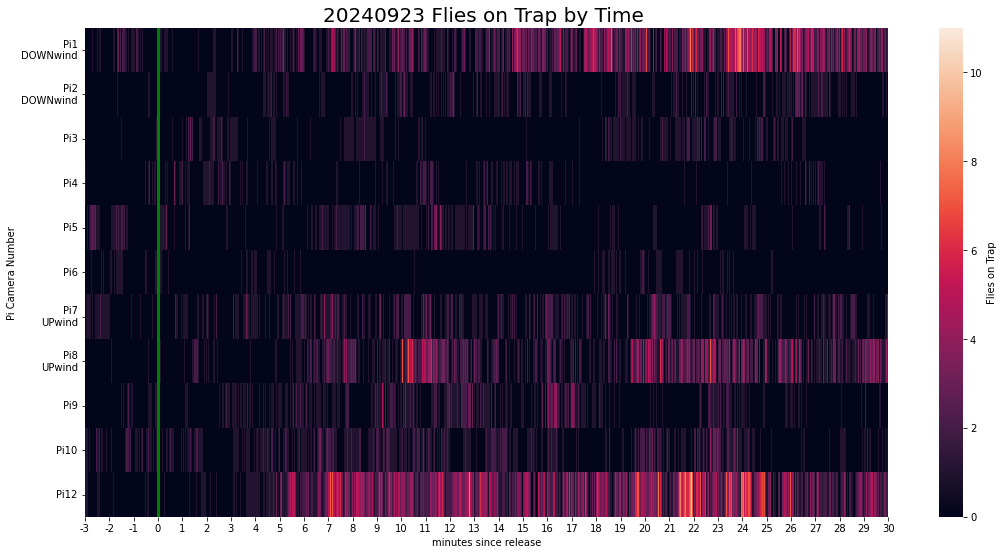

In [158]:
import seaborn as sns
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pdb
import sys
import glob
import os
import re
import pandas as pd
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline

matplotlib.rcParams['pdf.fonttype'] = 42


def calc_sec_since_release(standard,time_stamp):
	zero=int(standard[0:2])*3600+int(standard[3:5])*60+int(standard[6:8])+1
	sec=int(time_stamp[0:2])*3600+int(time_stamp[3:5])*60+int(time_stamp[6:8])
	sec_since_release=sec-zero
	return sec_since_release

def make_accumulation_list(list):
	acc_list=[]
	for i in range(len(list)):
		ele=np.sum(list[:i+1])
		acc_list.append(ele)
	return acc_list



#date=input("what date data you wanna use to make the plot (e.g. 20220725): ")
date='20240923'
#release=input("What time flies were released? (e.g. 093425) :")
release='082010'
if (len(release)==6 and type(int(release))==int):
	pass
else:
	print("please enter 6 numbers (000000-235959)")
	sys.exit()

path='/media/flyranch/14TB_Backup/field_release/'
json_path=path+'all_traps_final_analysis_json_files/'
list_of_files=sorted(glob.glob(json_path+date+'/*/master_*.json'))

released_time=release[0:2]+':'+release[2:4]+':'+release[4:6]

#c=0

with open(path+'wind_direction.json', 'r') as file:
    data = json.load(file)
file.close()

upwind_list=data["wind_direction"][date]["upwind"]
downwind_list=data["wind_direction"][date]["downwind"]
Color=''

Heat_lst=[]
Trap_name_lst=[]

for file in list_of_files:
    f=open(file)
    data=json.load(f)
    #create lists
    on_trap_list=[]
    in_trap_list=[]
    sec_since_release_list=[]
    actual_timestamp_list=[]


    string=file
    pattern='master'
    match=(re.search(pattern,string))
    
    j_pattern='.json'
    j_match=(re.finditer(j_pattern,string))
    count=0
    for i in j_match:
        if count==1:
            jj_match=i
        count+=1
    
    END=match.end()
    START=jj_match.start()
    DIFF=START-END
    
    if DIFF==24:
        trap_name=string[match.end()+6:-5] ###remove 'master_trap_' and '.json'
        t_name=string[match.end()+6:match.end()+9] ###Pi_X
    else:
        trap_name=string[match.end()+6:-5] ###remove 'master_trap_' and '.json'
        t_name=string[match.end()+6:match.end()+10] ###Pi_X
    #print(t_name[2:])

    for i in data['trap_'+trap_name]:
        for k in data['trap_'+trap_name][i]:
            if i=="flies on trap over time:":
                on_trap_list.append(k)
            elif i=="flies in trap over time:":
                in_trap_list.append(k)
    #		elif i=="seconds since release:":
    #			sec_since_release_list.append(int(k))
            elif i=="actual timestamp:":
                if len(str(int(k)))==5:
                    str_time='0'+str(int(k))[0:1]+':'+str(int(k))[1:3]+':'+str(int(k))[3:5]
                    actual_timestamp_list.append(str_time)
                elif len(str(int(k)))==6:
                    str_time=str(int(k))[0:2]+':'+str(int(k))[2:4]+':'+str(int(k))[4:6]
                    actual_timestamp_list.append(str_time)

    f.close()

    for i in actual_timestamp_list:
        s=calc_sec_since_release(released_time,i)
        sec_since_release_list.append(s)

    on_trap_acc_list=make_accumulation_list(on_trap_list)
    in_trap_acc_list=make_accumulation_list(in_trap_list)

    Heat_lst.append(on_trap_list)
    Trap_name_lst.append(t_name)


fig,ax=plt.subplots(figsize=(18,9))

sorted_Heat_lst=[]
sorted_Trap_name_lst=sorted(Trap_name_lst,key=len)
#print(sorted_Trap_name_lst)
for i in sorted_Trap_name_lst:
    for j in Trap_name_lst:
        if i==j:
            ind=Trap_name_lst.index(j)
            sorted_Heat_lst.append(Heat_lst[ind])

for name in sorted_Trap_name_lst:
    if int(name[2:]) in upwind_list:
        print(sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nUPwind')
        sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]=sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nUPwind'
    elif int(name[2:]) in downwind_list:
        print(sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nDOWNwind')
        sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]=sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nDOWNwind'

    
sorted_heat_df=pd.DataFrame(sorted_Heat_lst,index=sorted_Trap_name_lst)
hm=sns.heatmap(data=sorted_heat_df,cbar_kws={"label":"Flies on Trap"}) 

ax.set_xticks(np.arange(0,len(sorted_Heat_lst[0])+1,60))
ax.set_xticklabels(np.arange(-3,int(((len(sorted_Heat_lst[0])/60)-3+1)),1),rotation=0) ###3 mins before release + 30mins after release
ax.axvline(180,c="g",lw=3)
ax.set_xlabel('minutes since release')
ax.set_ylabel('Pi Camera Number')
ax.set_title(date+" Flies on Trap by Time ",fontsize=20)

out_path=path+'analyzed_plot_figures/'
ex_path=out_path+date

# Check whether the specified path exists or not
isExist = os.path.exists(ex_path)

if not isExist:  
  # Create a new directory because it does not exist 
    os.makedirs(ex_path)

plt.savefig(ex_path+'/'+date+'_hetmap.pdf',transparent=True)

# command to make a video from images

In [ ]:
ffmpeg -start_number 1461 -i /home/flyranch/field_data_and_analysis_scripts/2021lab/short_videos/20231003/20231003_trap1/tl_0000_%04d.jpg -c:v libx264 -pix_fmt yuv420p -r 5 /home/flyranch/field_data_and_analysis_scripts/2021lab/short_videos/20231003/20231003_trap1/output_3.mp4
    
    
    

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import sys





# to name output file
ind=0

fig=plt.figure()
ax=plt.axes()
#fig,ax=plt.subplots()

# to set range xlim, ylim
plt.xlim(-60,500)
plt.ylim(-0.5,16)

#x=np.linspace(-60,500)
#y=np.linspace(-0.5,16)

# set labels
plt.xlabel('Time (sec)')
plt.ylabel('Flies at Trap')

#ax.set_xlabel('time since release (sec)')
#ax.set_ylabel('flies at trap')

#set dark back ground
#plt.style.use('dark_background')
ax.patch.set_facecolor('black')
fig.patch.set_facecolor('black')

# set thick param and label color
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# hide spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white') 


#in advance, plot data till 360 sec
plt.plot(sec_since_release_list[:55], on_trap_list[:55], '-',markersize=6,color="r",label="on trap")
plt.savefig(+str(0)+'.svg')
#pdb.set_trace()

# 360 sec to 760 sec
for i in range(len(sec_since_release_list[:282])):
	plt.plot(sec_since_release_list[55:i], on_trap_list[55:i], '-',markersize=6,color="r",label="on trap")
	plt.savefig(+str(ind)+'.svg')
	ind+=1


plt.savefig(+str(ind)+'.svg',dpi=600)

# for 2025 March talk

## Initial 3 mins wind direction with collection of flies

    time  wind_direction  math_direction  wind_speed
24  0846      308.324957       -0.668940    1.021010
25  0847      297.150875       -0.473661    1.115211
26  0848      313.048413       -0.751348    1.180365
[-0.6689395548757784, -0.57130047614544, -0.6314357103267237]
[0.4564323949650667, 0.4774880574389814, 0.49421549382840874]
3
trap10
trap9
trap8
trap7
trap6
trap5
trap4
trap3
trap2
trap1
trap12
[  0  30  60  90 120 150 180 210 240 270 300 330]
5.846852994181004
12
12
12
[15, 11, 10, 15, 46, 19, 19, 4, 4, 5, 8, 0]
[4, 1, 0, 5, 4, 2, 3, 0, 0, 1, 3, 0]
[11, 10, 10, 10, 42, 17, 16, 4, 4, 4, 5, 0]


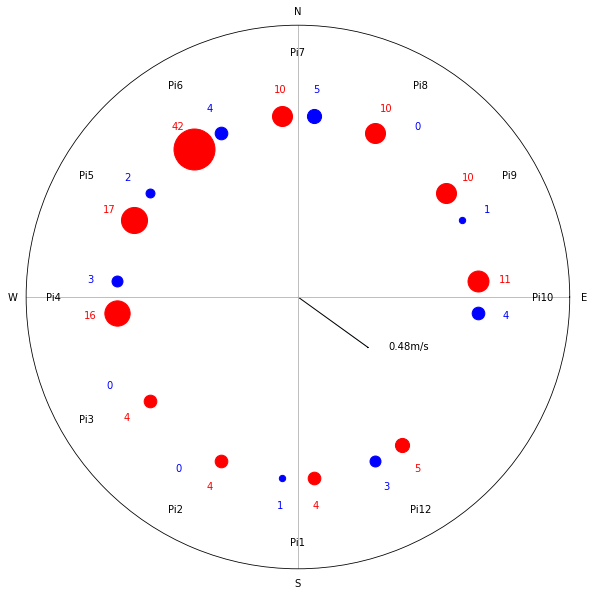

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib

def normalize_angle(angle):
  """
  Converts an angle to the range of 0 to 360 degrees.

  Args:
    angle: The angle in degrees.

  Returns:
    The normalized angle in the range of 0 to 360 degrees.
  """
  return angle % 360


##### wind speed-time plot with wind direction #####


#date=input("what date did you release flies (e.g. 20220804): ")
date='20240905'
wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
#release=input("what time did you release flies (e.g. 142040): ")
release='084649'
### local data path###
data_path="/media/flyranch/14TB_Backup/field_release/wind_data_files/"
### in BOX###
# Projects/Field_Trap/wind_data_files#
### local data path###
wind_txt=data_path+"anemometer_"+wind_data+".txt"
### in BOX###
#out_path='/media/flyranch/data21/field_release/wind_data_files/wind_data_plots/'
out_path=data_path+"wind_data_plots/"

wind_df=pd.read_csv(wind_txt,delimiter=' ',header=None)
wind_df.columns=("time","wind_direction","wind_speed")

time_list=[]

for i in wind_df.iloc[:,0]:
    time=datetime.datetime.fromtimestamp(i)
    str_h=str(time.hour)
    str_m=str(time.minute)
    str_s=str(time.second)
    if len(str_h)==1:
        str_h='0'+str_h
    if len(str_m)==1:
        str_m='0'+str_m
    if len(str_s)==1:
        str_s='0'+str_s
#    str_time=str_h+str_m+str_s # include seconds
    str_time=str_h+str_m
    time_list.append(str_time)
    
wind_df.iloc[:,0]=time_list

rad_d_list=[]
mean_angle_list=[]

for i in range(len(wind_df)): 
    math_d=270-wind_df['wind_direction'][i] # need to convert from weather direction to math angle
    if math_d<0:
        math_d=math_d+360
    rad=np.deg2rad(math_d) # convert to degree to radian
    if i==0:
        rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]==wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:
            rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]!=wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:       
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
            rad_d_list=[]
            rad_d_list.append(rad)

new_wind_df=wind_df.groupby(['time'], as_index=False).mean()

new_wind_df.insert(2,"math_direction",mean_angle_list, True)
#new_wind_df['direction']=mean_angle_list

num=new_wind_df[new_wind_df['time']==release[:4]].index[0]
#print(num)
fil_wind_df=new_wind_df.iloc[num-5:num+35,:]
#print(fil_wind_df)
filtered_wind_df=fil_wind_df.reset_index()

#print(filtered_wind_df)

'''
new_t_list=new_wind_df['time']
new_s_list=new_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=new_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))
'''

new_t_list=filtered_wind_df['time']
new_s_list=filtered_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=filtered_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))

matplotlib.rcParams['pdf.fonttype'] = 42
'''
fig=plt.figure(figsize=(20,10))
ax=plt.axes()

plt.plot(np.array(new_n_list),np.array(new_s_list), '-',markersize=6,color="r")
plt.title(date+' Time-Speed with Wind Direction')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
ax.set_xticks(new_n_list)
ax.set_xticklabels(new_t_list,rotation=45)
ax.set_ylim(0,3)
x_min=np.min(new_n_list)
x_max=np.max(new_n_list)
y_min=np.min(new_s_list)
y_max=np.max(new_s_list)

ratio=(x_max-x_min)/(y_max-y_min) # to adjust arrow length


#print(range(len(new_n_list)))
#print(new_n_list)
#print(new_d_list)

for i in range(len(new_n_list)):
    dx=(np.cos(new_d_list[i]))
    dy=(np.sin(new_d_list[i]))
    ax.annotate("",xy=(new_n_list[i],new_s_list[i]),
               xytext=(new_n_list[i]+dx,
                       new_s_list[i]+3*(dy/ratio)),arrowprops=dict(arrowstyle='-'))
    if new_t_list[i]==release[:4]:
        ax.axvline(x=i+1,ymax=3,ls='--',color='b')


#save_path='/home/flyranch/field_data_and_analysis_scripts/2021lab/analyzed_plot_figures/'
#ex_path=save_path+date

# Check whether the specified path exists or not
#isExist = os.path.exists(ex_path)

#if not isExist:  
  # Create a new directory because it does not exist 
#    os.mkdir(ex_path)

#plt.savefig(ex_path+'/'+date+'_wind_time_plot.svg')
#plt.savefig(out_path+date+'_wind_time_plot.pdf',transparent=True)
'''

ind=new_wind_df.index[new_wind_df['time']==release[:4]].tolist()[0]

release_df=new_wind_df.iloc[[ind,ind+1,ind+2]]


print(release_df)

dir_lst=[]
spd_lst=[]
wind_dir_lst=[]
dir_calc_lst=[]
spd_calc_lst=[]
wind_dir_calc_lst=[]
for i in release_df['math_direction']:
    dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(dir_calc_lst)),np.nanmean(np.cos(dir_calc_lst)))
    dir_lst.append(mean_angle)

for i in release_df['wind_direction']:
    wind_dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(wind_dir_calc_lst)),np.nanmean(np.cos(wind_dir_calc_lst)))
    wind_dir_lst.append(mean_angle)    
    
for i in release_df['wind_speed']:
    spd_calc_lst.append(i)
    mean_spd=np.mean(spd_calc_lst)*0.44704
    spd_lst.append(mean_spd)
    
initial_3_min_spd=np.mean(spd_lst)
    
#print(np.rad2deg(dir_lst))
#print(dir_calc_lst)
print(dir_lst)
print(spd_lst)
print(len(spd_lst))
#print(spd_calc_lst)


a=1 #number of rows
b=3 #number of columns
c=1 #plot counter

date_list11=["20240905","20240910","20240923","20241006"]
date_list12=["20240708","20240716","20240724","20240807","20240819","20240826"]
date_list8_1=["20240630"]
date_list8_2=["20230725","20230731","20230808","20231003","20231008","20231012"]
date_list8_3=["20230621","20230630"]


fig2,ax2=plt.subplots(figsize=(10,10),subplot_kw={'projection':'polar'})

with open('/media/flyranch/14TB_Backup/field_release/field_parameters_kh.json', 'r') as file:
    data = json.load(file)
file.close()


if date in date_list11:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,""]

    collection_list=[]
    f_collection_list=[]
    m_collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])
            f_collection_list.append(data["collections"][date]['trap'+str(pi)]["female"])
            m_collection_list.append(data["collections"][date]['trap'+str(pi)]["male"])   

    collection_list.append(0)
    f_collection_list.append(0)
    m_collection_list.append(0)
    #test_list=[19,30,22,16,8,4,5,11,25,24,22,0]
    r_list=[1]*12    
        
    ax2.set_rlim(0,1.5)
    ax2.set_rticks([])
    #ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    #ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,np.mean(dir_lst),np.mean(spd_lst))
    ax2.text(np.radians(330),initial_3_min_spd+0.1,str(np.round(initial_3_min_spd,2))+'m/s')
    for n in range(len(pi_loc_lst)):
        #plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        #print(np.radians(pi_loc_lst[n]+5))
        plt.scatter(np.radians(normalize_angle(pi_loc_lst[n]+5)),r_list[n],c='r',s=f_collection_list[n]*40,vmax=50,vmin=0)
        plt.scatter(np.radians(normalize_angle(pi_loc_lst[n]-5)),r_list[n],c='b',s=m_collection_list[n]*40,vmax=50,vmin=0)        
        #print(np.radians(normalize_angle(pi_loc_lst[n]-5)))
        if not n==11:
            ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                     ha='center',va='center')
            ax2.text(np.radians(normalize_angle(pi_loc_lst[n]+5)),r_list[n]+0.15,str(f_collection_list[n]),
                     ha='center',va='center',c='r')
            ax2.text(np.radians(normalize_angle(pi_loc_lst[n]-5)),r_list[n]+0.15,str(m_collection_list[n]),
                     ha='center',va='center',c='b')
            #plt.colorbar()

            
path='/home/flyranch/kei_project/test/esa_figures'

#plt.savefig(path+'/field_'+date+'_wind_with_collection.svg',transparent=True)
#plt.savefig(path+'/field_'+date+'_wind_with_collection.pdf',transparent=True)   
print(pi_loc_lst)
print(np.radians(normalize_angle(pi_loc_lst[n]+5)))

print(len(m_collection_list))
print(len(f_collection_list))
print(len(collection_list))
print(collection_list)
print(m_collection_list)
print(f_collection_list)

## male, female ratio across trap

119


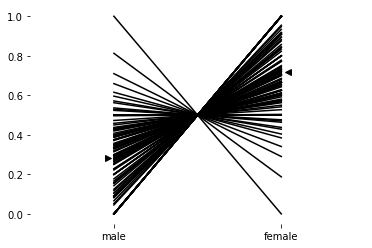

In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42

def male_female_ratio_calculator(MALE_LIST,FEMALE_LIST,TOTAL_LIST):
    
    M_RATIO_LIST=[]
    F_RATIO_LIST=[]
    
    for i in range(len(TOTAL_LIST)):
        if (MALE_LIST[i]>0) and (FEMALE_LIST[i]>0):
            M_RATIO=MALE_LIST[i]/TOTAL_LIST[i]
            F_RATIO=1-M_RATIO
            M_RATIO_LIST.append(M_RATIO)
            F_RATIO_LIST.append(F_RATIO)
        elif (MALE_LIST[i]==0) and (FEMALE_LIST[i]==0):
            M_RATIO=0
            F_RATIO=1-M_RATIO
            M_RATIO_LIST.append(M_RATIO)
            F_RATIO_LIST.append(F_RATIO)            
        elif (MALE_LIST[i]==0) and (FEMALE_LIST[i]>0):
            M_RATIO=0
            F_RATIO=1-M_RATIO
            M_RATIO_LIST.append(M_RATIO)
            F_RATIO_LIST.append(F_RATIO)
        elif (FEMALE_LIST[i]==0) and (MALE_LIST[i]>0):
            M_RATIO=1
            F_RATIO=1-M_RATIO
            M_RATIO_LIST.append(M_RATIO)
            F_RATIO_LIST.append(F_RATIO)
        
    return M_RATIO_LIST,F_RATIO_LIST




with open('/media/flyranch/14TB_Backup/field_release/field_parameters_kh.json', 'r') as file:
    data = json.load(file)
file.close()


### these date meet the conditions "red wine+vinegar","D.suzukii",and "starvation"

date_list=["20231008",'20231012','20240724','20240807','20240819','20240826',
           '20240905','20240905','20240910','20240923','20241006']


male_list=[]
female_list=[]
total_list=[]


for date in date_list:
    for trap in data['collections'][date]:
        if trap!='all':
            male_list.append(data['collections'][date][trap]['male'])
            female_list.append(data['collections'][date][trap]['female'])
            total_list.append(data['collections'][date][trap]['total'])
            
m_ratio_list,f_ratio_list=male_female_ratio_calculator(male_list,female_list,total_list)    

m_mean_ratio=np.mean(m_ratio_list)
f_mean_ratio=np.mean(f_ratio_list)



fig,ax=plt.subplots()

#ax.set_ylim(0,1)
ax.set_xlim(0.1,0.18)
ax.set_xticks([0.12,0.16],labels=['male','female'])
for spine in ax.spines.values():
    spine.set_visible(False)

    
ax.plot(0.1185,m_mean_ratio,'k>')
ax.plot(0.1615,f_mean_ratio,'k<')
    
for i in range(len(m_ratio_list)):
    ratio_list=[m_ratio_list[i],f_ratio_list[i]]
    if m_ratio_list[i]<=0.5:
        ax.plot([0.12,0.16],ratio_list,c='k')
    else:
        ax.plot([0.12,0.16],ratio_list,c='k')    

        
path='/home/flyranch/kei_project/test/esa_figures'            
            
#plt.savefig(path+'/field_all_traps_m_f_ratio.svg',transparent=True)
#plt.savefig(path+'/field_all_traps_m_f_ratio.pdf',transparent=True)     
        
    
print(len(total_list))

## new heatmap

Pi5
UPwind
Pi6
UPwind
Pi12
DOWNwind


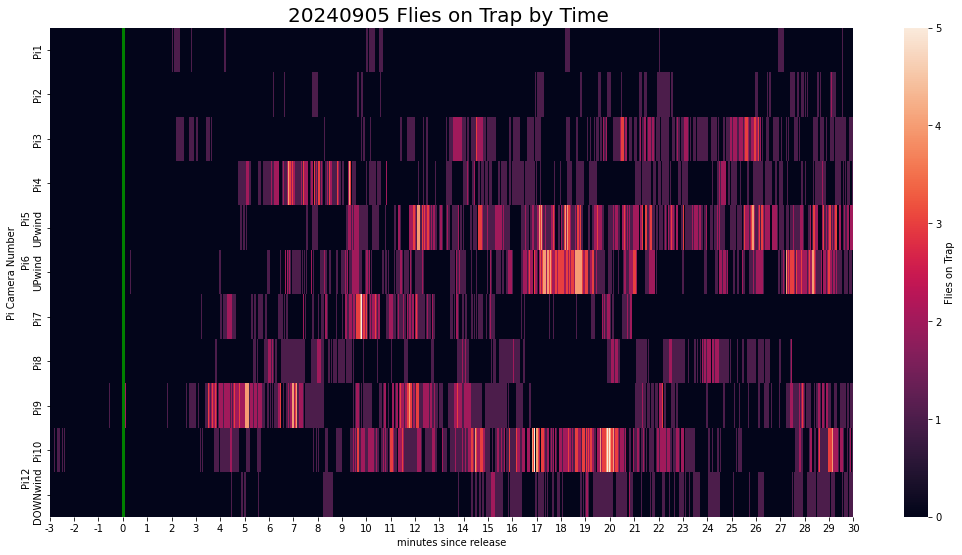

In [223]:
import seaborn as sns
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pdb
import sys
import glob
import os
import re
import pandas as pd
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline

matplotlib.rcParams['pdf.fonttype'] = 42


def calc_sec_since_release(standard,time_stamp):
	zero=int(standard[0:2])*3600+int(standard[3:5])*60+int(standard[6:8])+1
	sec=int(time_stamp[0:2])*3600+int(time_stamp[3:5])*60+int(time_stamp[6:8])
	sec_since_release=sec-zero
	return sec_since_release

def make_accumulation_list(list):
	acc_list=[]
	for i in range(len(list)):
		ele=np.sum(list[:i+1])
		acc_list.append(ele)
	return acc_list



#date=input("what date data you wanna use to make the plot (e.g. 20220725): ")
date='20240905'
#release=input("What time flies were released? (e.g. 093425) :")
release='084649'
if (len(release)==6 and type(int(release))==int):
	pass
else:
	print("please enter 6 numbers (000000-235959)")
	sys.exit()

path='/media/flyranch/14TB_Backup/field_release/'
json_path=path+'all_traps_final_analysis_json_files/'
list_of_files=sorted(glob.glob(json_path+date+'/*/master_*.json'))

released_time=release[0:2]+':'+release[2:4]+':'+release[4:6]

#c=0

with open(path+'wind_direction.json', 'r') as file:
    data = json.load(file)
file.close()

upwind_list=data["wind_direction"][date]["upwind"]
downwind_list=data["wind_direction"][date]["downwind"]
Color=''

Heat_lst=[]
Trap_name_lst=[]

for file in list_of_files:
    f=open(file)
    data=json.load(f)
    #create lists
    on_trap_list=[]
    in_trap_list=[]
    sec_since_release_list=[]
    actual_timestamp_list=[]


    string=file
    pattern='master'
    match=(re.search(pattern,string))
    
    j_pattern='.json'
    j_match=(re.finditer(j_pattern,string))
    count=0
    for i in j_match:
        if count==1:
            jj_match=i
        count+=1
    
    END=match.end()
    START=jj_match.start()
    DIFF=START-END
    
    if DIFF==24:
        trap_name=string[match.end()+6:-5] ###remove 'master_trap_' and '.json'
        t_name=string[match.end()+6:match.end()+9] ###Pi_X
    else:
        trap_name=string[match.end()+6:-5] ###remove 'master_trap_' and '.json'
        t_name=string[match.end()+6:match.end()+10] ###Pi_X
    #print(t_name[2:])

    for i in data['trap_'+trap_name]:
        for k in data['trap_'+trap_name][i]:
            if i=="flies on trap over time:":
                on_trap_list.append(k)
            elif i=="flies in trap over time:":
                in_trap_list.append(k)
    #		elif i=="seconds since release:":
    #			sec_since_release_list.append(int(k))
            elif i=="actual timestamp:":
                if len(str(int(k)))==5:
                    str_time='0'+str(int(k))[0:1]+':'+str(int(k))[1:3]+':'+str(int(k))[3:5]
                    actual_timestamp_list.append(str_time)
                elif len(str(int(k)))==6:
                    str_time=str(int(k))[0:2]+':'+str(int(k))[2:4]+':'+str(int(k))[4:6]
                    actual_timestamp_list.append(str_time)

    f.close()

    for i in actual_timestamp_list:
        s=calc_sec_since_release(released_time,i)
        sec_since_release_list.append(s)

    on_trap_acc_list=make_accumulation_list(on_trap_list)
    in_trap_acc_list=make_accumulation_list(in_trap_list)

    Heat_lst.append(on_trap_list)
    Trap_name_lst.append(t_name)


fig,ax=plt.subplots(figsize=(18,9))

sorted_Heat_lst=[]
sorted_Trap_name_lst=sorted(Trap_name_lst,key=len)
#print(sorted_Trap_name_lst)
for i in sorted_Trap_name_lst:
    for j in Trap_name_lst:
        if i==j:
            ind=Trap_name_lst.index(j)
            sorted_Heat_lst.append(Heat_lst[ind])

for name in sorted_Trap_name_lst:
    if int(name[2:]) in upwind_list:
        print(sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nUPwind')
        sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]=sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nUPwind'
    elif int(name[2:]) in downwind_list:
        print(sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nDOWNwind')
        sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]=sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nDOWNwind'

    
sorted_heat_df=pd.DataFrame(sorted_Heat_lst,index=sorted_Trap_name_lst)
hm=sns.heatmap(data=sorted_heat_df,cbar_kws={"label":"Flies on Trap"}) 

ax.set_xticks(np.arange(0,len(sorted_Heat_lst[0])+1,60))
ax.set_xticklabels(np.arange(-3,int(((len(sorted_Heat_lst[0])/60)-3+1)),1),rotation=0) ###3 mins before release + 30mins after release
ax.axvline(180,c="g",lw=3)
ax.set_xlabel('minutes since release')
ax.set_ylabel('Pi Camera Number')
ax.set_title(date+" Flies on Trap by Time ",fontsize=20)

out_path=path+'analyzed_plot_figures/'
ex_path=out_path+date

# Check whether the specified path exists or not
#isExist = os.path.exists(ex_path)

#if not isExist:  
  # Create a new directory because it does not exist 
#    os.makedirs(ex_path)

#plt.savefig(ex_path+'/'+date+'_hetmap.pdf',transparent=True)

In [225]:
sorted_heat_df

,0,1,2,3,4,5,6,7,8,9,...,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
Pi1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Pi4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Pi5\nUPwind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
Pi6\nUPwind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
Pi7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Pi10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0


In [226]:
series_list=[]
name_list=[5,6,4,7,3,8,2,9,1,10,12]


for num in name_list:
    tmp_series_list=[]
    for i in sorted_heat_df.iloc:
        if str(num) in i.name:
            #print(i.name)
            tmp_series_list.append(i.name)
            if len(tmp_series_list)==1:
                #print(tmp_series_list[0])
                #print(i)
            #tmp_series_list_r=tmp_series_list[0]
                series_list.append(i)
            
concat_df=pd.concat([series_list[0],series_list[1],series_list[2],series_list[3],series_list[4],series_list[5],
          series_list[6],series_list[7],series_list[8],series_list[9],series_list[10]],axis=1)



transposed_df=concat_df.transpose()


transposed_df

,0,1,2,3,4,5,6,7,8,9,...,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
Pi5\nUPwind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
Pi6\nUPwind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
Pi4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Pi7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Pi8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Pi1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0


In [227]:
import re

def get_string_between(text, start_string, end_string):
  """
  Extracts the string located between two specified strings in a given text.

  Args:
    text: The main string to search within.
    start_string: The string marking the beginning of the desired substring.
    end_string: The string marking the end of the desired substring.

  Returns:
    The extracted substring, or None if either start or end string is not found,
    or if the end string appears before the start string.
  """
  try:
    start_index = text.index(start_string) + len(start_string)
    end_index = text.index(end_string, start_index)
    return text[start_index:end_index]
  except ValueError:
    return None

# Example usage
text = "This is a test [sample] string."
start_string = "["
end_string = "]"
result = get_string_between(text, start_string, end_string)

if result:
  print(f"Extracted string: {result}")
else:
  print("Start or end string not found, or invalid order.")


# Example using regular expressions for more complex scenarios
def get_string_between_regex(text, start_pattern, end_pattern):
    """
    Extracts a string between two patterns using regular expressions.

    Args:
        text: The string to search within.
        start_pattern: The regex pattern for the start delimiter.
        end_pattern: The regex pattern for the end delimiter.

    Returns:
        The extracted string or None if not found.
    """
    match = re.search(f'{start_pattern}(.*?){end_pattern}', text)
    return match.group(1) if match else None

text = "Begin--content_to_extract--End"
start_pattern = r'--'
end_pattern = r'--'

extracted_content = get_string_between_regex(text, start_pattern, end_pattern)

if extracted_content:
    print(f"Extracted content: {extracted_content}")
else:
    print("No match found.")

Extracted string: sample
Extracted content: content_to_extract


In [228]:
def get_travel_time(release_time,first_arrival):
    released=int(release_time[:2])*3600+int(release_time[2:4])*60+int(release_time[4:])
    arrival=int(first_arrival[:2])*3600+int(first_arrival[2:4])*60+int(first_arrival[4:])
    travel_time=arrival-released
    return travel_time


def get_travel_time_list(DATE,PI_NAME_LIST,PATH):
    
    with open(PATH+'field_parameters_kh.json', 'r') as file:
        data=json.load(file)
    file.close()
    
    release_time=data["time_of_fly_release"][DATE]
    released=int(release_time[:2])*3600+int(release_time[3:5])*60+int(release_time[6:])
    
    with open(PATH+'first_arrival_time_by_eyes.json', 'r') as file:
        first_arrival_data=json.load(file)
    file.close()

    first_arrival_time_list=[]    
    travel_time_list=[]
    
    for n in PI_NAME_LIST:
        for i in first_arrival_data['first_arrival_frame']:
            if DATE in i:
                pi=get_string_between(i,"Pi","_")
                if str(n)==pi:
                    #print(str(first_arrival_data['first_arrival_frame'][i]))
                    first_arrival_time_list.append(first_arrival_data['first_arrival_frame'][i])

    for i in first_arrival_time_list:
        #print(i)
        arrival=int(i[:2])*3600+int(i[2:4])*60+int(i[4:])
        travel_time=arrival-released
        travel_time_list.append(travel_time)
        
    return travel_time_list




[290, 230, 260, 194, 131, 231, 371, 165, 370, 192, 268]


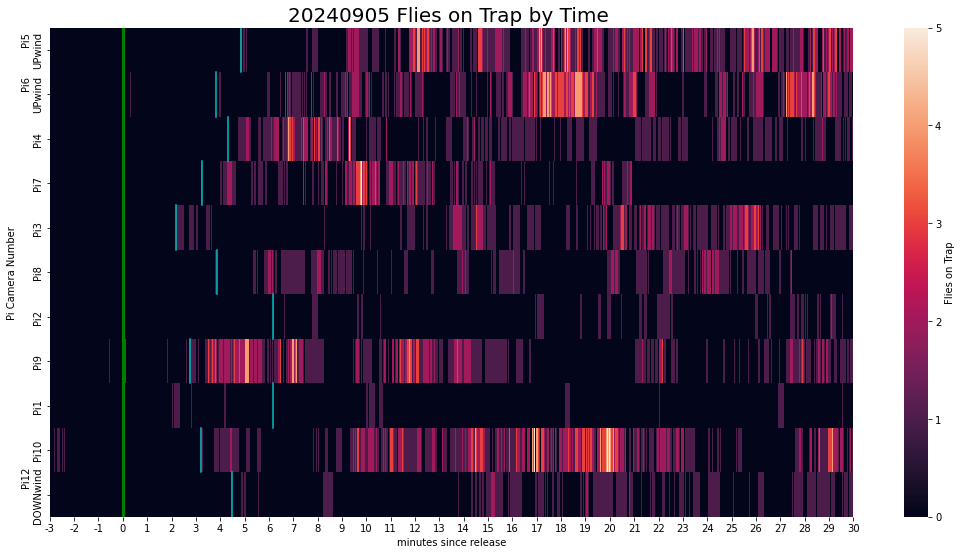

In [230]:
t_lst=get_travel_time_list(date,name_list,path)
print(t_lst)

fig,ax=plt.subplots(figsize=(18,9))

hm=sns.heatmap(data=transposed_df,cbar_kws={"label":"Flies on Trap"}) 

ax.set_xticks(np.arange(0,len(sorted_Heat_lst[0])+1,60))
ax.set_xticklabels(np.arange(-3,int(((len(sorted_Heat_lst[0])/60)-3+1)),1),rotation=0) ###3 mins before release + 30mins after release
ax.axvline(180,c="g",lw=3)
ax.set_xlabel('minutes since release')
ax.set_ylabel('Pi Camera Number')
ax.set_title(date+" Flies on Trap by Time ",fontsize=20)


for i in range(len(first_arrival_time_list)):
    #travel_time=get_travel_time(release,first_arrival_time_list[i])
    #print(travel_time)
    #print(t_lst[i])
    ax.axvline(x=180+t_lst[i],ymin=(len(first_arrival_time_list)-i-1)/len(first_arrival_time_list),ymax=(len(first_arrival_time_list)-i)/len(first_arrival_time_list),c='c')
    
#path='/home/flyranch/kei_project/test/esa_figures'
outpath='/media/flyranch/14TB_Backup/field_release/analyzed_plot_figures/'
#plt.savefig(path+'/'+date+'_heatmap.pdf',transparent=True)
#plt.savefig(path+'/field_'+date+'_heatmap.svg',transparent=True)
plt.savefig(outpath+date+'/'+date+'_heatmap_ver2.pdf',transparent=True) 